<a href="https://colab.research.google.com/github/abhinag007/Stock-Money-MLM/blob/master/LSTM_Stock_Predict_trading_IBM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

In [ ]:
import math
import pandas_datareader.data as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import time
plt.style.use('fivethirtyeight') 

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [ ]:
pip install alpha_vantage

     |████████████████████████████████| 1.2MB 6.6MB/s 
     |████████████████████████████████| 153kB 16.6MB/s 
     |████████████████████████████████| 266kB 18.7MB/s 
  Created wheel for alpha-vantage: filename=alpha_vantage-2.2.0-cp36-none-any.whl size=25705 sha256=6902d400358fb1a883afae2800d162236701f87a9f9d96659524b9b047659290
  Stored in directory: /root/.cache/pip/wheels/3a/fa/05/80b0afcbd2a4de8bd2a0c5cd77084e3d3a9cc12c48be9b7f84
  Created wheel for idna-ssl: filename=idna_ssl-1.1.0-cp36-none-any.whl size=3162 sha256=cecff42925fb98aa0d9c99282f52b392ca61e5a819051f3e9a058a08f1aa483c
  Stored in directory: /root/.cache/pip/wheels/d3/00/b3/32d613e19e08a739751dd6bf998cfed277728f8b2127ad4eb7
Successfully built alpha-vantage idna-ssl


In [ ]:
api_key = '5LLGMLRK81AS4OEH'

In [ ]:
import pandas as pd
from alpha_vantage.timeseries import TimeSeries
import time
import matplotlib.pyplot as plt
from alpha_vantage.foreignexchange import ForeignExchange

In [ ]:
ts = TimeSeries(key=api_key,output_format='pandas')
df, meta_data = ts.get_daily(symbol='IBM', outputsize='full')
print(df)

            1. open   2. high  3. low  4. close   5. volume
date                                                       
2020-08-24   123.79  126.0600  123.36    125.68   4070816.0
2020-08-21   123.01  123.4842  122.31    123.16   3385051.0
2020-08-20   123.20  124.0400  122.81    123.15   2561164.0
2020-08-19   124.83  125.5000  123.50    123.84   3743949.0
2020-08-18   125.00  125.5000  124.24    124.92   2882355.0
...             ...       ...     ...       ...         ...
1999-11-05    92.75   92.9400   90.19     90.25  13737600.0
1999-11-04    94.44   94.4400   90.00     91.56  16697600.0
1999-11-03    95.87   95.9400   93.50     94.37  10369100.0
1999-11-02    96.75   96.8100   93.69     94.81  11105400.0
1999-11-01    98.50   98.8100   96.37     96.75   9551800.0

[5237 rows x 5 columns]


In [ ]:
# cc = ForeignExchange(key = api_key, output_format = 'pandas')
# df, meta_data = cc.get_currency_exchange_intraday(from_symbol='GBP', to_symbol='JPY',interval='1min',outputsize='full')
# print(df)

In [ ]:
df = df[::-1]
df

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
1999-11-01,98.50,98.8100,96.37,96.75,9551800.0
1999-11-02,96.75,96.8100,93.69,94.81,11105400.0
1999-11-03,95.87,95.9400,93.50,94.37,10369100.0
1999-11-04,94.44,94.4400,90.00,91.56,16697600.0
1999-11-05,92.75,92.9400,90.19,90.25,13737600.0
...,...,...,...,...,...
2020-08-18,125.00,125.5000,124.24,124.92,2882355.0
2020-08-19,124.83,125.5000,123.50,123.84,3743949.0
2020-08-20,123.20,124.0400,122.81,123.15,2561164.0


In [ ]:
#Get the stock quote
# df = web.DataReader('TATAMOTORS.NS', data_source='yahoo',start = '2020-01-25', end = date.today())

In [ ]:
df

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
1999-11-01,98.50,98.8100,96.37,96.75,9551800.0
1999-11-02,96.75,96.8100,93.69,94.81,11105400.0
1999-11-03,95.87,95.9400,93.50,94.37,10369100.0
1999-11-04,94.44,94.4400,90.00,91.56,16697600.0
1999-11-05,92.75,92.9400,90.19,90.25,13737600.0
...,...,...,...,...,...
2020-08-18,125.00,125.5000,124.24,124.92,2882355.0
2020-08-19,124.83,125.5000,123.50,123.84,3743949.0
2020-08-20,123.20,124.0400,122.81,123.15,2561164.0


In [ ]:
#show the data
df['Date'] = df.index

In [ ]:
# sum_column = (df["2. high"] + df["3. low"])/2
# df["avg"] = sum_column

In [ ]:
df

,1. open,2. high,3. low,4. close,5. volume,Date
date,,,,,,
1999-11-01,98.50,98.8100,96.37,96.75,9551800.0,1999-11-01
1999-11-02,96.75,96.8100,93.69,94.81,11105400.0,1999-11-02
1999-11-03,95.87,95.9400,93.50,94.37,10369100.0,1999-11-03
1999-11-04,94.44,94.4400,90.00,91.56,16697600.0,1999-11-04
1999-11-05,92.75,92.9400,90.19,90.25,13737600.0,1999-11-05
...,...,...,...,...,...,...
2020-08-18,125.00,125.5000,124.24,124.92,2882355.0,2020-08-18
2020-08-19,124.83,125.5000,123.50,123.84,3743949.0,2020-08-19
2020-08-20,123.20,124.0400,122.81,123.15,2561164.0,2020-08-20


In [ ]:
#Get number of rows and colomns in datasets
df.shape

(5237, 6)

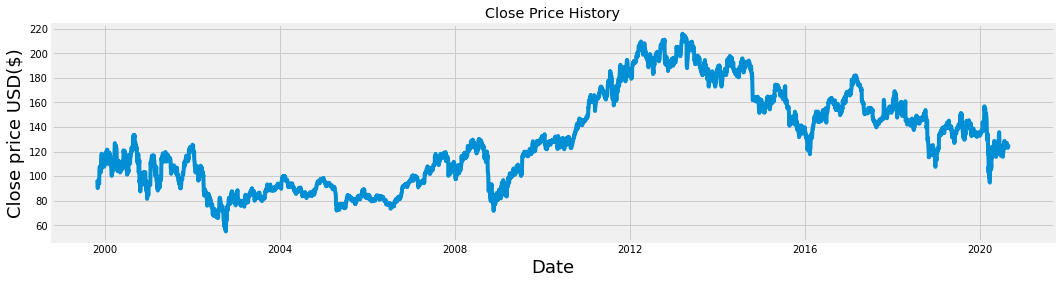

In [ ]:
# Close price history
plt.figure(figsize=(16,4))
plt.title('Close Price History')
plt.plot(df['4. close'],);
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close price USD($)', fontsize = 18)
plt.show()

In [ ]:
# Create new dataframe with only close coloumn
data = df.filter(['4. close'])
# Convert dataframe to numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = math.ceil( len(dataset) * 0.8)

training_data_len

4190

In [ ]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.25931687],
       [0.24724694],
       [0.24450943],
       ...,
       [0.42356747],
       [0.42362969],
       [0.43930816]])

In [ ]:
# Create training datasets
# Create the scaled training datasets
train_data = scaled_data[0:training_data_len,:]
# Slit x_train and y_train datasets
x_train = []
y_train = []
for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=60:
    print(x_train)
    print(y_train)
    print() 

[array([0.25931687, 0.24724694, 0.24450943, 0.22702669, 0.21887638,
       0.24183413, 0.23984322, 0.26087227, 0.24842904, 0.25384185,
       0.24258073, 0.24606483, 0.24065203, 0.26709388, 0.30405027,
       0.32850121, 0.31724009, 0.30753437, 0.31064518, 0.30560567,
       0.29857525, 0.30081503, 0.31232502, 0.35338767, 0.37908293,
       0.38294033, 0.39326821, 0.36272009, 0.33553164, 0.33988677,
       0.33708704, 0.32308841, 0.33671374, 0.34175325, 0.33677596,
       0.34249984, 0.32931002, 0.33316742, 0.34019785, 0.34057114,
       0.33553164, 0.33397623, 0.32850121, 0.37908293, 0.35456978,
       0.37908293, 0.36663971, 0.3635289 , 0.39152616, 0.39774778,
       0.40085858, 0.39308157, 0.40160518, 0.37752753, 0.40085858,
       0.39774778, 0.41330181, 0.41330181, 0.39849437, 0.38374914])]
[0.3635288993965034]



In [ ]:
# convert x_train y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
# Reshape the data
x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[1],1))
x_train.shape

(4130, 60, 1)

In [ ]:
# Build LSTM Model
model = Sequential()
model.add(LSTM(50,return_sequences=True, input_shape = (x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(15))
model.add(Dense(1))

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics = ['accuracy'])


In [ ]:
model.fit(x_train,y_train,batch_size=512, epochs = 30,)

Epoch 1/30
9/9 [==============================] - 5s 567ms/step - loss: 2.7226 - accuracy: 0.0000e+00
Epoch 2/30
9/9 [==============================] - 5s 580ms/step - loss: 1.8098 - accuracy: 2.4213e-04
Epoch 3/30
9/9 [==============================] - 5s 586ms/step - loss: 1.4493 - accuracy: 0.0000e+00
Epoch 4/30
9/9 [==============================] - 5s 588ms/step - loss: 1.0960 - accuracy: 2.4213e-04
Epoch 5/30
9/9 [==============================] - 5s 589ms/step - loss: 0.7775 - accuracy: 2.4213e-04
Epoch 6/30
9/9 [==============================] - 5s 603ms/step - loss: 0.5596 - accuracy: 0.0000e+00
Epoch 7/30
9/9 [==============================] - 5s 609ms/step - loss: 0.3845 - accuracy: 0.0000e+00
Epoch 8/30
9/9 [==============================] - 6s 619ms/step - loss: 0.2652 - accuracy: 2.4213e-04
Epoch 9/30
9/9 [==============================] - 6s 620ms/step - loss: 0.1834 - accuracy: 2.4213e-04
Epoch 10/30
9/9 [==============================] - 6s 620ms/step - loss: 0.1352 - 

In [ ]:
# Crete testing datasets
# Create a new array containing scaled value from index 1704 to 2130
test_data = scaled_data[training_data_len-60: ,:]
# Create dataset x_test, y_test 
x_test = []
y_test = dataset[training_data_len: ,:]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [ ]:
x_test = np.array(x_test)

In [ ]:
# Reshape the data
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [ ]:
# x_test = range(10)

In [ ]:
# Get model prediction price value
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 1000)          4008000   
_________________________________________________________________
dropout (Dropout)            (None, 60, 1000)          0         
_________________________________________________________________
batch_normalization (BatchNo (None, 60, 1000)          4000      
_________________________________________________________________
lstm_1 (LSTM)                (None, 1000)              8004000   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1000)              0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 1000)              4000      
_________________________________________________________________
dense (Dense)                (None, 1000)              1

In [ ]:
rmse = np.sqrt( np.mean(predictions - y_test)**2)
rmse

57.38517174925708

In [ ]:
# PLot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(12,4))
plt.title("Model")
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price USD($) ', fontsize=18)
# plt.plot(train['4.close'])
plt.plot(valid[['4. close', 'Predictions']])
plt.legend(['Close','Val','Predictions'],loc = 'lower right')
plt.tight_layout()
plt.show()

ValueError: ignored

In [ ]:
# valid.sum(axis=0)

In [ ]:
valid

In [ ]:
# # Get the quote
# # apple_quote = web.DataReader('TATAMOTORS.NS',data_source='yahoo',start='2012-01-01',end='2020-06-22')
# apple_quote, meta_data = cc.get_currency_exchange_intraday(from_symbol='GBP', to_symbol='JPY',interval='1min',outputsize='full')
# apple_quote = apple_quote[::-1]
# sum_column = (apple_quote["2. high"] + apple_quote["3. low"])/2
# apple_quote["average"] = sum_column
# # Create new dataframe
# new_df = apple_quote.filter(items=['average'])
# # Get the last 60 days closing price and convert to numpy array
# last_60_days = new_df[-60:].values
# # Scale the data to be values between 0 and 1
# last_60_days_scaled = scaler.transform(last_60_days)
# # Create an empty list
# X_test = []
# # Append the past 60 days
# X_test.append(last_60_days_scaled)

# # Convert the X_test dataset to numpy array
# X_test = np.array(X_test)
# # Reshape the data
# X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
# # Get Predicted scaled price
# pred_price = model.predict(X_test)
# # undo the scaling
# pred_price = scaler.inverse_transform(pred_price)
# comp = (new_df['average'][-1])
# # comp = float("{:.5f}".format(comp))
# # pred_price = float(pred_price)
# # pred_price = float("{:.4f}".format(pred_price))
# print(pred_price)
# print(comp)
# if pred_price > comp:
#   print("green")
# elif pred_price < comp:
#   print("red")
# else:
#   print ("Dont buy or sell")

In [ ]:
# new, meta_data = cc.get_currency_exchange_intraday(from_symbol='AUD', to_symbol='JPY',interval='5min',outputsize='full')
# new = new[::-1]
# print(new.tail(10))

In [ ]:
# pred_price = np.reshape(pred_price,1)
# lst_2 = np.reshape(lst_2,60)
# lst_2 = np.append(lst_2,pred_price)
# lst_2 = lst_2[1:]
# lst_2=np.reshape(lst_2,(1,60,1))
# pred_price = model.predict(lst_2)
# pred_price = scaler.inverse_transform(pred_price)
# print(pred_price)
# pred_price = scaler.transform(pred_price)